In [1]:
import pandas as pd; import numpy as np;

In [2]:
nt=pd.DataFrame({"sinif":list("ABC")*4,
                "ders":["mat","dif"]*6,
                "cinsiyet":list("EKEE")*3,
                "kardes":[1,2,3]*4,
                "puan":np.arange(40,100,5)})
nt

,sinif,ders,cinsiyet,kardes,puan
0,A,mat,E,1,40
1,B,dif,K,2,45
2,C,mat,E,3,50
3,A,dif,E,1,55
4,B,mat,E,2,60
5,C,dif,K,3,65
6,A,mat,E,1,70
7,B,dif,E,2,75
8,C,mat,E,3,80
9,A,dif,K,1,85


In [3]:
# dersleri gruplandırarak puanların ortalamasını aldık ve yazdırdık

nt.groupby("ders")["puan"].mean()

ders
dif    70.0
mat    65.0
Name: puan, dtype: float64

In [4]:
# ders ve sınıfı gruplandırıp, puanların ders ve sınıflara göre ortalamasını aldık.
# unstack() ile tablolaştırma işlemini yaptık
# nt.groupby(["ders","sinif"])["puan"].aggregate("mean").unstack()

nt.groupby(["ders","sinif"])["puan"].mean().unstack()

sinif,A,B,C
ders,,,
dif,70.0,60.0,80.0
mat,55.0,75.0,65.0


In [5]:
# Pivot Table ile yukarıdaki işlemi gerçekleştirdik

nt.pivot_table("puan", index="ders", columns="sinif")

sinif,A,B,C
ders,,,
dif,70,60,80
mat,55,75,65


In [6]:
nt.pivot_table(["kardes","puan"],
              index=["sinif","ders"],
              columns="cinsiyet")

kardes       puan      
cinsiyet        E    K     E     K
sinif ders                        
A     dif     1.0  1.0  55.0  85.0
      mat     1.0  NaN  55.0   NaN
B     dif     2.0  2.0  75.0  45.0
      mat     2.0  NaN  75.0   NaN
C     dif     3.0  3.0  95.0  65.0
      mat     3.0  NaN  65.0   NaN

In [7]:
# Hem satırların hem sütunların ortalamasını alıp ALL adında satır ve sütun eklemek için margins=True kullandık.

nt.pivot_table(["kardes","puan"],
              index=["sinif","ders"],
              columns="cinsiyet", margins=True)

kardes                 puan            
cinsiyet        E    K  All          E     K   All
sinif ders                                        
A     dif     1.0  1.0  1.0  55.000000  85.0  70.0
      mat     1.0  NaN  1.0  55.000000   NaN  55.0
B     dif     2.0  2.0  2.0  75.000000  45.0  60.0
      mat     2.0  NaN  2.0  75.000000   NaN  75.0
C     dif     3.0  3.0  3.0  95.000000  65.0  80.0
      mat     3.0  NaN  3.0  65.000000   NaN  65.0
All           2.0  2.0  2.0  68.333333  65.0  67.5

In [8]:
# eksik verilerin yerine değer atamak için fill_value kullandık

nt.pivot_table(["kardes","puan"],
              index=["sinif","ders"],
              columns="cinsiyet", margins=True, fill_value=0)

kardes               puan          
cinsiyet        E  K  All          E   K   All
sinif ders                                    
A     dif       1  1  1.0  55.000000  85  70.0
      mat       1  0  1.0  55.000000   0  55.0
B     dif       2  2  2.0  75.000000  45  60.0
      mat       2  0  2.0  75.000000   0  75.0
C     dif       3  3  3.0  95.000000  65  80.0
      mat       3  0  3.0  65.000000   0  65.0
All             2  2  2.0  68.333333  65  67.5

In [9]:
kardes = pd.cut(nt["kardes"],[0,2,3])
nt.pivot_table("puan",["ders",kardes],"sinif")

sinif           A     B     C
ders kardes                  
dif  (0, 2]  70.0  60.0   NaN
     (2, 3]   NaN   NaN  80.0
mat  (0, 2]  55.0  75.0   NaN
     (2, 3]   NaN   NaN  65.0

In [10]:
nt.pivot_table("puan", index="ders", columns="sinif")

sinif,A,B,C
ders,,,
dif,70,60,80
mat,55,75,65


In [11]:
nt.pivot_table("puan", index="ders", columns="sinif", aggfunc="sum")

sinif,A,B,C
ders,,,
dif,140,120,160
mat,110,150,130


In [12]:
# Crosstab tablo

pd.crosstab(nt.kardes, nt.sinif)

sinif,A,B,C
kardes,,,
1,4,0,0
2,0,4,0
3,0,0,4


In [13]:
pd.crosstab([nt.kardes, nt.ders], nt.sinif)

sinif        A  B  C
kardes ders         
1      dif   2  0  0
       mat   2  0  0
2      dif   0  2  0
       mat   0  2  0
3      dif   0  0  2
       mat   0  0  2

In [14]:
dogum = pd.read_csv("births1.txt")
dogum.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [15]:
dogum["onyil"]=5*(dogum["year"]//5)
dogum.pivot_table("births", index="onyil", columns="gender", aggfunc="sum")

gender,F,M
onyil,,
1965,1753634,1846572
1970,8224392,8659947
1975,8038683,8461603
1980,8898836,9356506
1985,9411515,9886946
1990,9913375,10395760
1995,9566079,10024793
2000,9931641,10406088
2005,8297668,8700340


In [16]:
import matplotlib.pyplot as plt;
import seaborn as sns;

In [17]:
%matplotlib inline

Text(0, 0.5, 'Yillik toplam doğum')

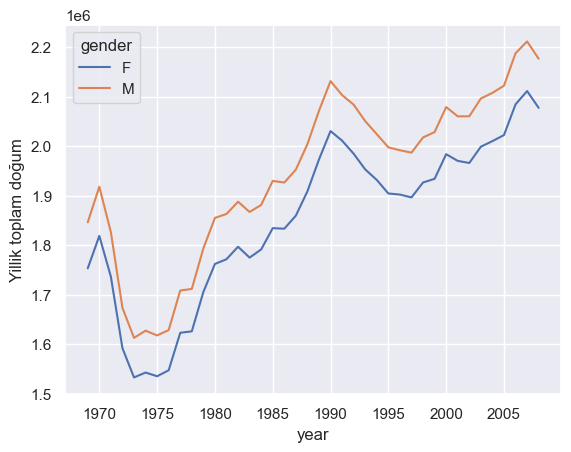

In [18]:
sns.set()
dogum.pivot_table("births", index="year", columns="gender", aggfunc="sum").plot()
plt.ylabel("Yillik toplam doğum")